# **Черновая работа с признаками.**

## Импорты.

In [22]:
import numpy as np
import pandas as pd
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5, palette='Set2')

## Первичный анализ признаков.

Задача: построить случайный лес.

### Загрузка данных.

Посмотрим на данные.

In [ ]:
data = pd.read_csv('known_behaviors2.csv')
data.head()

customer_id  age  age_youngest_child  debt_equity  gender  bad_payment  \
0           15   45                  12           45       0            0   
1           16   43                  12           43       0            0   
2           30   23                   0           23       0            0   
3           42   35                   8           35       1            0   
4           52   43                  12           43       1            0   

   gold_card  pension_plan  household_debt_to_equity_ratio  income  ...  \
0          0             0                              65   13453  ...   
1          0             0                              65   13453  ...   
2          0             0                              65   13453  ...   
3          0             0                              65   13453  ...   
4          0             0                              47   14124  ...   

   call_center_contacts  loan_accounts  number_products  number_transactions  \
0                     0              4                2                    1   
1                     0              0                3                    2   
2                     0              1                0                    0   
3                     0              1                0                    0   
4                     3              1                0                    0   

   non_worker_percentage  white_collar_percentage  rfm_score  Mortgage  \
0                     14                       19      7.602         0   
1                     14                       19     10.143         0   
2                     14                       19      0.000         0   
3                     14                       19      0.000         0   
4                     16                       35      0.000         0   

   Pension  Savings  
0        0        0  
1        0        0  
2        0        0  
3        1        0  
4        1        0  

[5 rows x 23 columns]

In [ ]:
test = pd.read_csv('unknown_behaviors.csv')
test.head()

customer_id  age  age_youngest_child  debt_equity  gender  bad_payment  \
0        44256   38                  11           38       1            0   
1        46883   30                   1           30       0            0   
2        32387   41                  13           41       1            0   
3        25504   42                  14           42       1            0   
4        35979   42                  14           42       1            0   

   gold_card  pension_plan  household_debt_to_equity_ratio   income  \
0          0             0                              58  47958.0   
1          0             0                              55  48606.0   
2          0             0                              59  42152.0   
3          0             0                              57  39788.0   
4          0             0                              53  44365.0   

   members_in_household  months_current_account  months_customer  \
0                     4                      41               48   
1                     2                      23               36   
2                     4                      39               48   
3                     3                      21               24   
4                     6                      41               48   

   call_center_contacts  loan_accounts  number_products  number_transactions  \
0                     2              1                2                    1   
1                     2              4                3                    2   
2                     1              0                1                    1   
3                     2              3                0                    0   
4                     3              2                3                    1   

   non_worker_percentage  white_collar_percentage  rfm_score  
0                      9                       31      7.949  
1                     11                       33     11.437  
2                     11                       29      7.462  
3                     15                       27      0.000  
4                      5                       41      7.806

Посмотрим на значения столбцов.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11023 entries, 0 to 11022
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     11023 non-null  int64  
 1   age                             11023 non-null  int64  
 2   age_youngest_child              11023 non-null  int64  
 3   debt_equity                     11023 non-null  int64  
 4   gender                          11023 non-null  int64  
 5   bad_payment                     11023 non-null  int64  
 6   gold_card                       11023 non-null  int64  
 7   pension_plan                    11023 non-null  int64  
 8   household_debt_to_equity_ratio  11023 non-null  int64  
 9   income                          11023 non-null  int64  
 10  members_in_household            11023 non-null  int64  
 11  months_current_account          11023 non-null  int64  
 12  months_customer                 

Есть ли пропуски.

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
test.isnull().sum().sum()

0

Пропусков нет. Разделим data на train и test.

In [ ]:
train_columns = test.columns
train_data = data[train_columns]
test_data = data[['Mortgage', 'Pension', 'Savings']]

### Проверки предположений по данным.

Уникальность id.

In [ ]:
data['customer_id'].nunique()

9532

Как обозначается отсутствие детей.

In [ ]:
data[(data['age_youngest_child'] < 1)].head()

customer_id  age  age_youngest_child  debt_equity  gender  bad_payment  \
2            30   23                   0           23       0            0   
6            74   31                   0           31       1            0   
7            74   31                   0           31       1            0   
11          105   31                   0           31       0            0   
23          191   24                   0           24       0            0   

    gold_card  pension_plan  household_debt_to_equity_ratio  income  ...  \
2           0             0                              65   13453  ...   
6           0             0                              50   14838  ...   
7           0             0                              50   14838  ...   
11          0             0                              32   14783  ...   
23          0             0                              60   16287  ...   

    call_center_contacts  loan_accounts  number_products  number_transactions  \
2                      0              1                0                    0   
6                      3              3                0                    0   
7                      3              3                0                    0   
11                     6              0                0                    0   
23                     1              1                0                    0   

    non_worker_percentage  white_collar_percentage  rfm_score  Mortgage  \
2                      14                       19        0.0         0   
6                       9                       39        0.0         1   
7                       9                       39        0.0         1   
11                     25                       42        0.0         0   
23                      7                       32        0.0         0   

    Pension  Savings  
2         0        0  
6         0        0  
7         0        0  
11        0        0  
23        0        0  

[5 rows x 23 columns]

Исследуем `pension plan`. Сколько людей имеют 1 в колонке.

In [ ]:
data[(data['pension_plan'] == 1)].count().mean()

63.0

In [ ]:
data[(data['pension_plan'] == 1)][['Pension']].sum()

Pension    14
dtype: int64

In [ ]:
data[(data['pension_plan'] == 0)].count().mean()

10960.0

In [ ]:
data[(data['pension_plan'] == 0)][['Pension']].sum()

Pension    2442
dtype: int64

Есть ли клиенты без долга.

In [ ]:
data[(data['debt_equity'] < 1)]

Empty DataFrame
Columns: [customer_id, age, age_youngest_child, debt_equity, gender, bad_payment, gold_card, pension_plan, household_debt_to_equity_ratio, income, members_in_household, months_current_account, months_customer, call_center_contacts, loan_accounts, number_products, number_transactions, non_worker_percentage, white_collar_percentage, rfm_score, Mortgage, Pension, Savings]
Index: []

[0 rows x 23 columns]

Соотношение долга к собственному капиталу домохозяйства. У всех клинтов доход больше долга.

In [ ]:
data[(data['household_debt_to_equity_ratio'] < 1)].shape

(0, 23)

Доход. Доходы всех клиентов положительны, максимальный доход по data составляет 78675.

In [ ]:
data[(data['income'] < 1)].shape

(0, 23)

In [ ]:
data[['income']].max().sum()

78675

Число членов домохозяйста. Или же размер семьи, принимает значения от 1 до 7

In [ ]:
data[['members_in_household']].min()

members_in_household    1
dtype: int64

In [ ]:
data[['members_in_household']].max()

members_in_household    7
dtype: int64

Что такое `months_current_account` ? Было предположение, что это количество месяцев, которые существует текущий счет у клиента. Но вот отпровержения этой гипотезы. Возможно это сумма на платежном счете?

In [ ]:
data[['months_current_account']].max()

months_current_account    41
dtype: int64

In [ ]:
data[['months_current_account']].min()

months_current_account   -7
dtype: int64

In [ ]:
data[(data['months_current_account'] < 1)][['months_current_account', 'loan_accounts', 'months_customer']].head()

months_current_account  loan_accounts  months_customer
6                        0              3               12
7                        0              3               12
12                      -1              1                0
17                      -2              2                0
20                      -3              1                0

Что такое `months_customer`? Удалось выяснить, что если `month customer` 0, то `months_current_account` отрицателен.

In [ ]:
data[['months_customer']].max()

months_customer    48
dtype: int64

In [ ]:
data[['months_customer']].min()

months_customer    0
dtype: int64

In [ ]:
print(data[(data['months_customer'] < 1)][['months_customer', 'months_current_account', 'loan_accounts']].shape)
data[(data['months_customer'] < 1)][['months_customer', 'months_current_account', 'loan_accounts']].head()

(1165, 3)


months_customer  months_current_account  loan_accounts
12                0                      -1              1
17                0                      -2              2
20                0                      -3              1
50                0                      -6              0
51                0                      -6              0

In [ ]:
print(data[((data['months_customer'] < 1) & (data['months_current_account'] < 1))][['months_customer', 'months_current_account', 'loan_accounts']].shape)
data[((data['months_customer'] < 1) & (data['months_current_account'] < 1))][['months_customer', 'months_current_account', 'loan_accounts']].head()

(1165, 3)


months_customer  months_current_account  loan_accounts
12                0                      -1              1
17                0                      -2              2
20                0                      -3              1
50                0                      -6              0
51                0                      -6              0

Про `call_center_contacts`.

In [ ]:
data[['call_center_contacts']].max()

call_center_contacts    10
dtype: int64

Проверка `loan_accounts`

In [ ]:
data[['loan_accounts']].max()

loan_accounts    7
dtype: int64

In [ ]:
print(data[(data['loan_accounts'] > 0)][['months_customer', 'months_current_account', 'loan_accounts']].shape)
data[(data['loan_accounts'] > 0)][['months_customer', 'months_current_account', 'loan_accounts']].head()

(6204, 3)


months_customer  months_current_account  loan_accounts
0               36                      33              4
2               36                      30              1
3               24                      22              1
4               48                      40              1
6               12                       0              3

In [ ]:
print(data[(data['loan_accounts'] == 0)][['months_customer', 'months_current_account', 'loan_accounts']].shape)
data[(data['loan_accounts'] == 0)][['months_customer', 'months_current_account', 'loan_accounts']].head()

(4819, 3)


months_customer  months_current_account  loan_accounts
1                36                      34              0
5                36                      33              0
11               24                      17              0
16               24                      11              0
18               36                      27              0

Про `number_products`

In [ ]:
data[['number_products']].max()

number_products    6
dtype: int64

In [ ]:
print(data[(data['number_products'] > 0)][['number_products', 'months_customer', 'months_current_account', 'loan_accounts']].shape)
data[(data['number_products'] > 0)][['number_products', 'months_customer', 'months_current_account', 'loan_accounts', 'Mortgage', 'Pension', 'Savings']].head()

(5930, 4)


number_products  months_customer  months_current_account  loan_accounts  \
0                 2               36                      33              4   
1                 3               36                      34              0   
8                 2               12                       6              3   
9                 2               36                      35              2   
10                4               24                      16              2   

    Mortgage  Pension  Savings  
0          0        0        0  
1          0        0        0  
8          0        1        0  
9          0        0        0  
10         0        0        0

Про `number_transactions`

In [ ]:
data[['number_transactions']].max()

number_transactions    38
dtype: int64

In [ ]:
print(data[(data['number_transactions'] > 0)][['number_transactions', 'months_customer', 'months_current_account', 'loan_accounts']].shape)
data[(data['number_transactions'] > 0)][['number_transactions', 'months_customer', 'months_current_account', 'loan_accounts', 'Mortgage', 'Pension', 'Savings']].head()

(5770, 4)


number_transactions  months_customer  months_current_account  \
0                     1               36                      33   
1                     2               36                      34   
8                     1               12                       6   
9                     2               36                      35   
10                    3               24                      16   

    loan_accounts  Mortgage  Pension  Savings  
0               4         0        0        0  
1               0         0        0        0  
8               3         0        1        0  
9               2         0        0        0  
10              2         0        0        0

Что такое `non_worker_percentage`? То, что это процент неработающих в домохозяйстве опровергается ниже.

In [ ]:
data[['non_worker_percentage']].max()

non_worker_percentage    37
dtype: int64

In [ ]:
data[(data['non_worker_percentage'] > 35)][['non_worker_percentage', 'age', 'age_youngest_child', 'members_in_household']].head()

non_worker_percentage  age  age_youngest_child  members_in_household
5204                     37   41                   9                     5
5205                     37   41                   9                     5
5206                     37   47                  17                     5

In [ ]:
data[(data['non_worker_percentage'] == 0)][['non_worker_percentage', 'age', 'age_youngest_child', 'members_in_household']].head()

non_worker_percentage  age  age_youngest_child  members_in_household
7838                      0   25                   1                     4
7839                      0   25                   1                     4

In [ ]:
data[['white_collar_percentage']].max()

white_collar_percentage
0                           19
1                           19
2                           19
3                           19
4                           35
...                        ...
11018                       27
11019                       32
11020                       21
11021                       28
11022                       30

[11023 rows x 1 columns]

In [ ]:
data[['white_collar_percentage', 'non_worker_percentage', 'age', 'age_youngest_child', 'members_in_household']].head()

white_collar_percentage  non_worker_percentage  age  age_youngest_child  \
0                       19                     14   45                  12   
1                       19                     14   43                  12   
2                       19                     14   23                   0   
3                       19                     14   35                   8   
4                       35                     16   43                  12   

   members_in_household  
0                     2  
1                     2  
2                     2  
3                     2  
4                     3

### Полученная информация о признаках.

Числовые признаки для обучения:

*    `customer id` - уникальный идентификатор клиента, число уникальных клиентов в data = $9532$
*    `age` - возраст клиента
*    `age youngest child` - возраст младшего ребенка в семье клиента, если нет детей, то $0$
*    `debt equity` - размер собственного долга, у всех клиентов положительное число
*    `household debt to equity ratio` - отношение долга к собственному капиталу домохозяйства
*    `income` - доход клиента
*    `members in household` - число членов домохозяйства (от 1 до 7)
*    `months current account` - ??
*    `months customer` - ??
*    `call center contacts` - предположительно число обращений в колл-центр
*    `loan accounts` - предположительно число кредитных счетов
*    `number products` - предположительно число продуктов, купленное клиентом за все время
*    `number transactions` - предположительно число транзакций
*    `non worker percentage` - ??
*    `white collar percentage` - ??
*    `rfm scors` - баллы rfm, скорее какой-то сложно вычисляемый коэффициент, полученный из RFM-анализа

---

Категориальные признаки для обучения:

*    `gender` - гендер (неизвестно, где какой)
*    `bad payment` - плохая платежеспособность (предположительно 1 , если плохая, 0, если хорошая)
*    `gold card` - начиличе золотой карты (1, если есть, 0, если нет)
*    `pension plan` - пенсионный план (не понятно, что это такое)

---

Целевые признаки:

*    `Mortgage` - ипотечные кредиты
*    `Pension` - пенсия
*    `Savings` - сбережения

### Зависимости между числовыми признаками.

Выберем числовые признаки.

In [ ]:
numeric_features = ['customer_id', 'age', 'age_youngest_child', 'debt_equity',
       'household_debt_to_equity_ratio', 'income', 'members_in_household',
       'months_current_account', 'months_customer', 'call_center_contacts',
       'loan_accounts', 'number_products', 'number_transactions',
       'non_worker_percentage', 'white_collar_percentage', 'rfm_score']

Построим для них `pair_plot`.

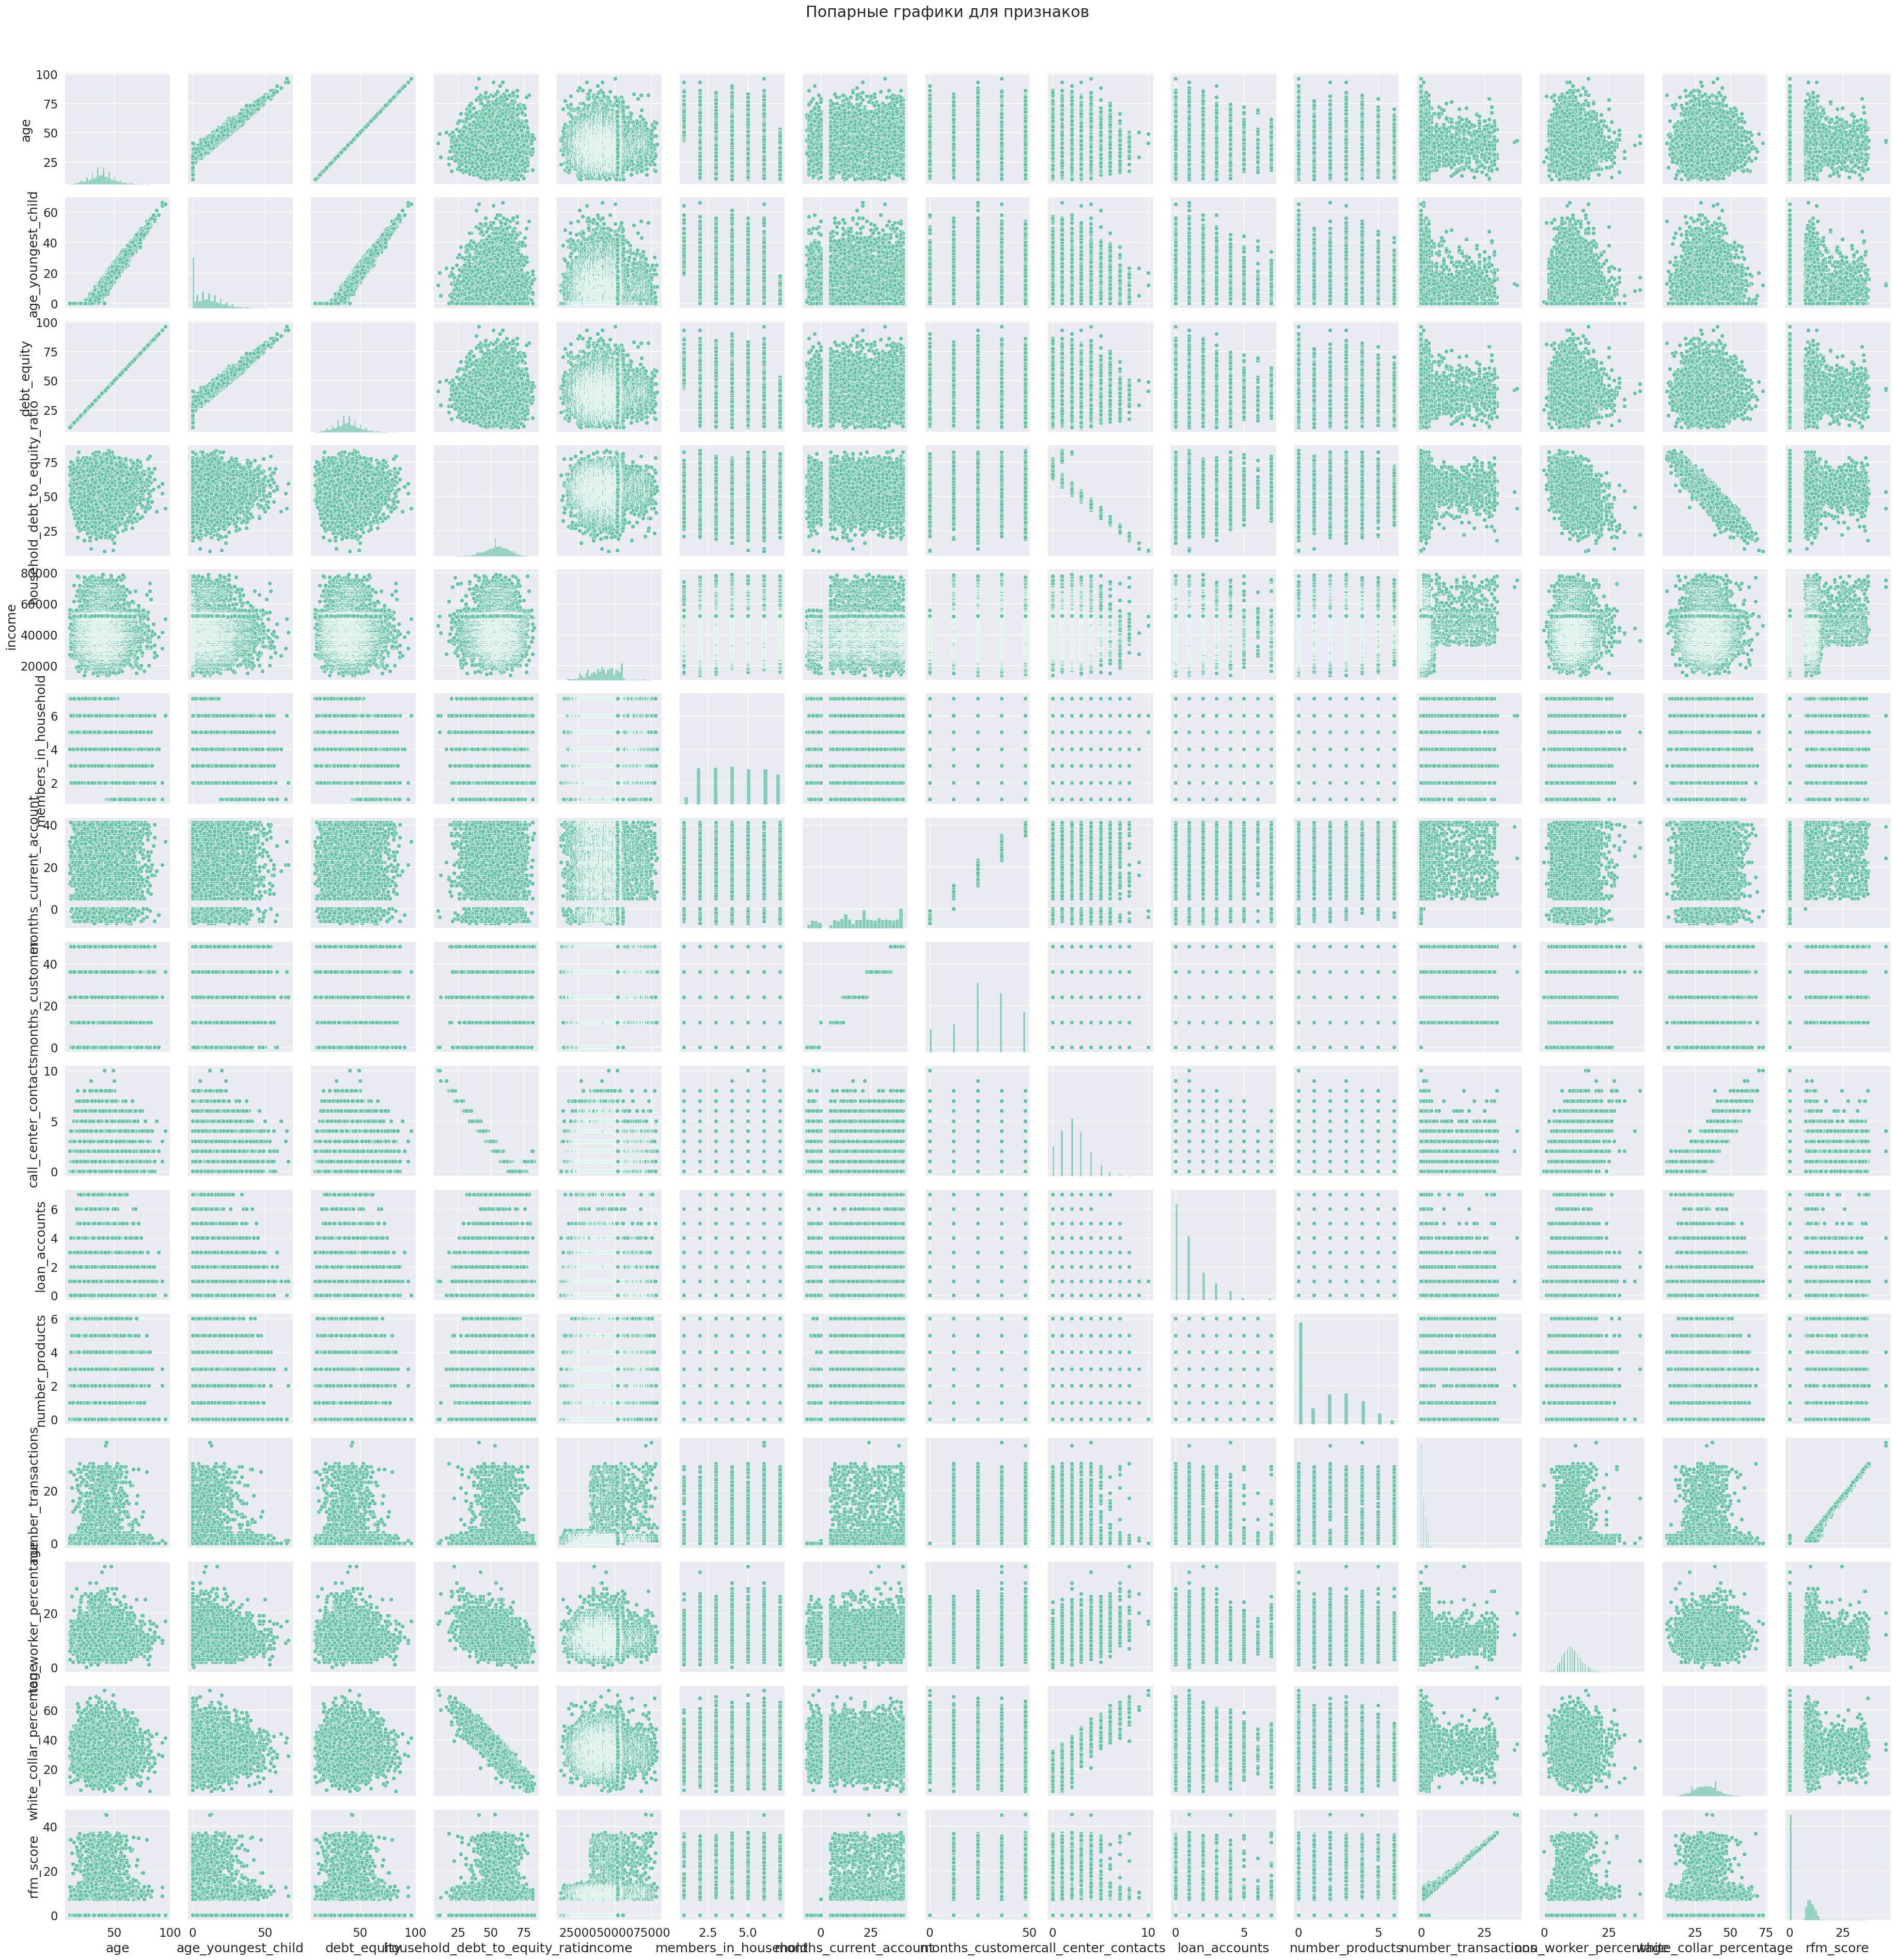

In [ ]:
sns.pairplot(train_data[numeric_features])
plt.suptitle("Попарные графики для признаков", y=1.02)
plt.show()

Видно, что некоторые признаки в смысле зависимостей не информативны. Уберем их.

In [ ]:
analitic_features = ['age', 'age_youngest_child', 'debt_equity',
       'household_debt_to_equity_ratio', 'income', 'number_transactions',
       'non_worker_percentage', 'white_collar_percentage', 'rfm_score']

Строим `pair_plot` для выбранных признаков.

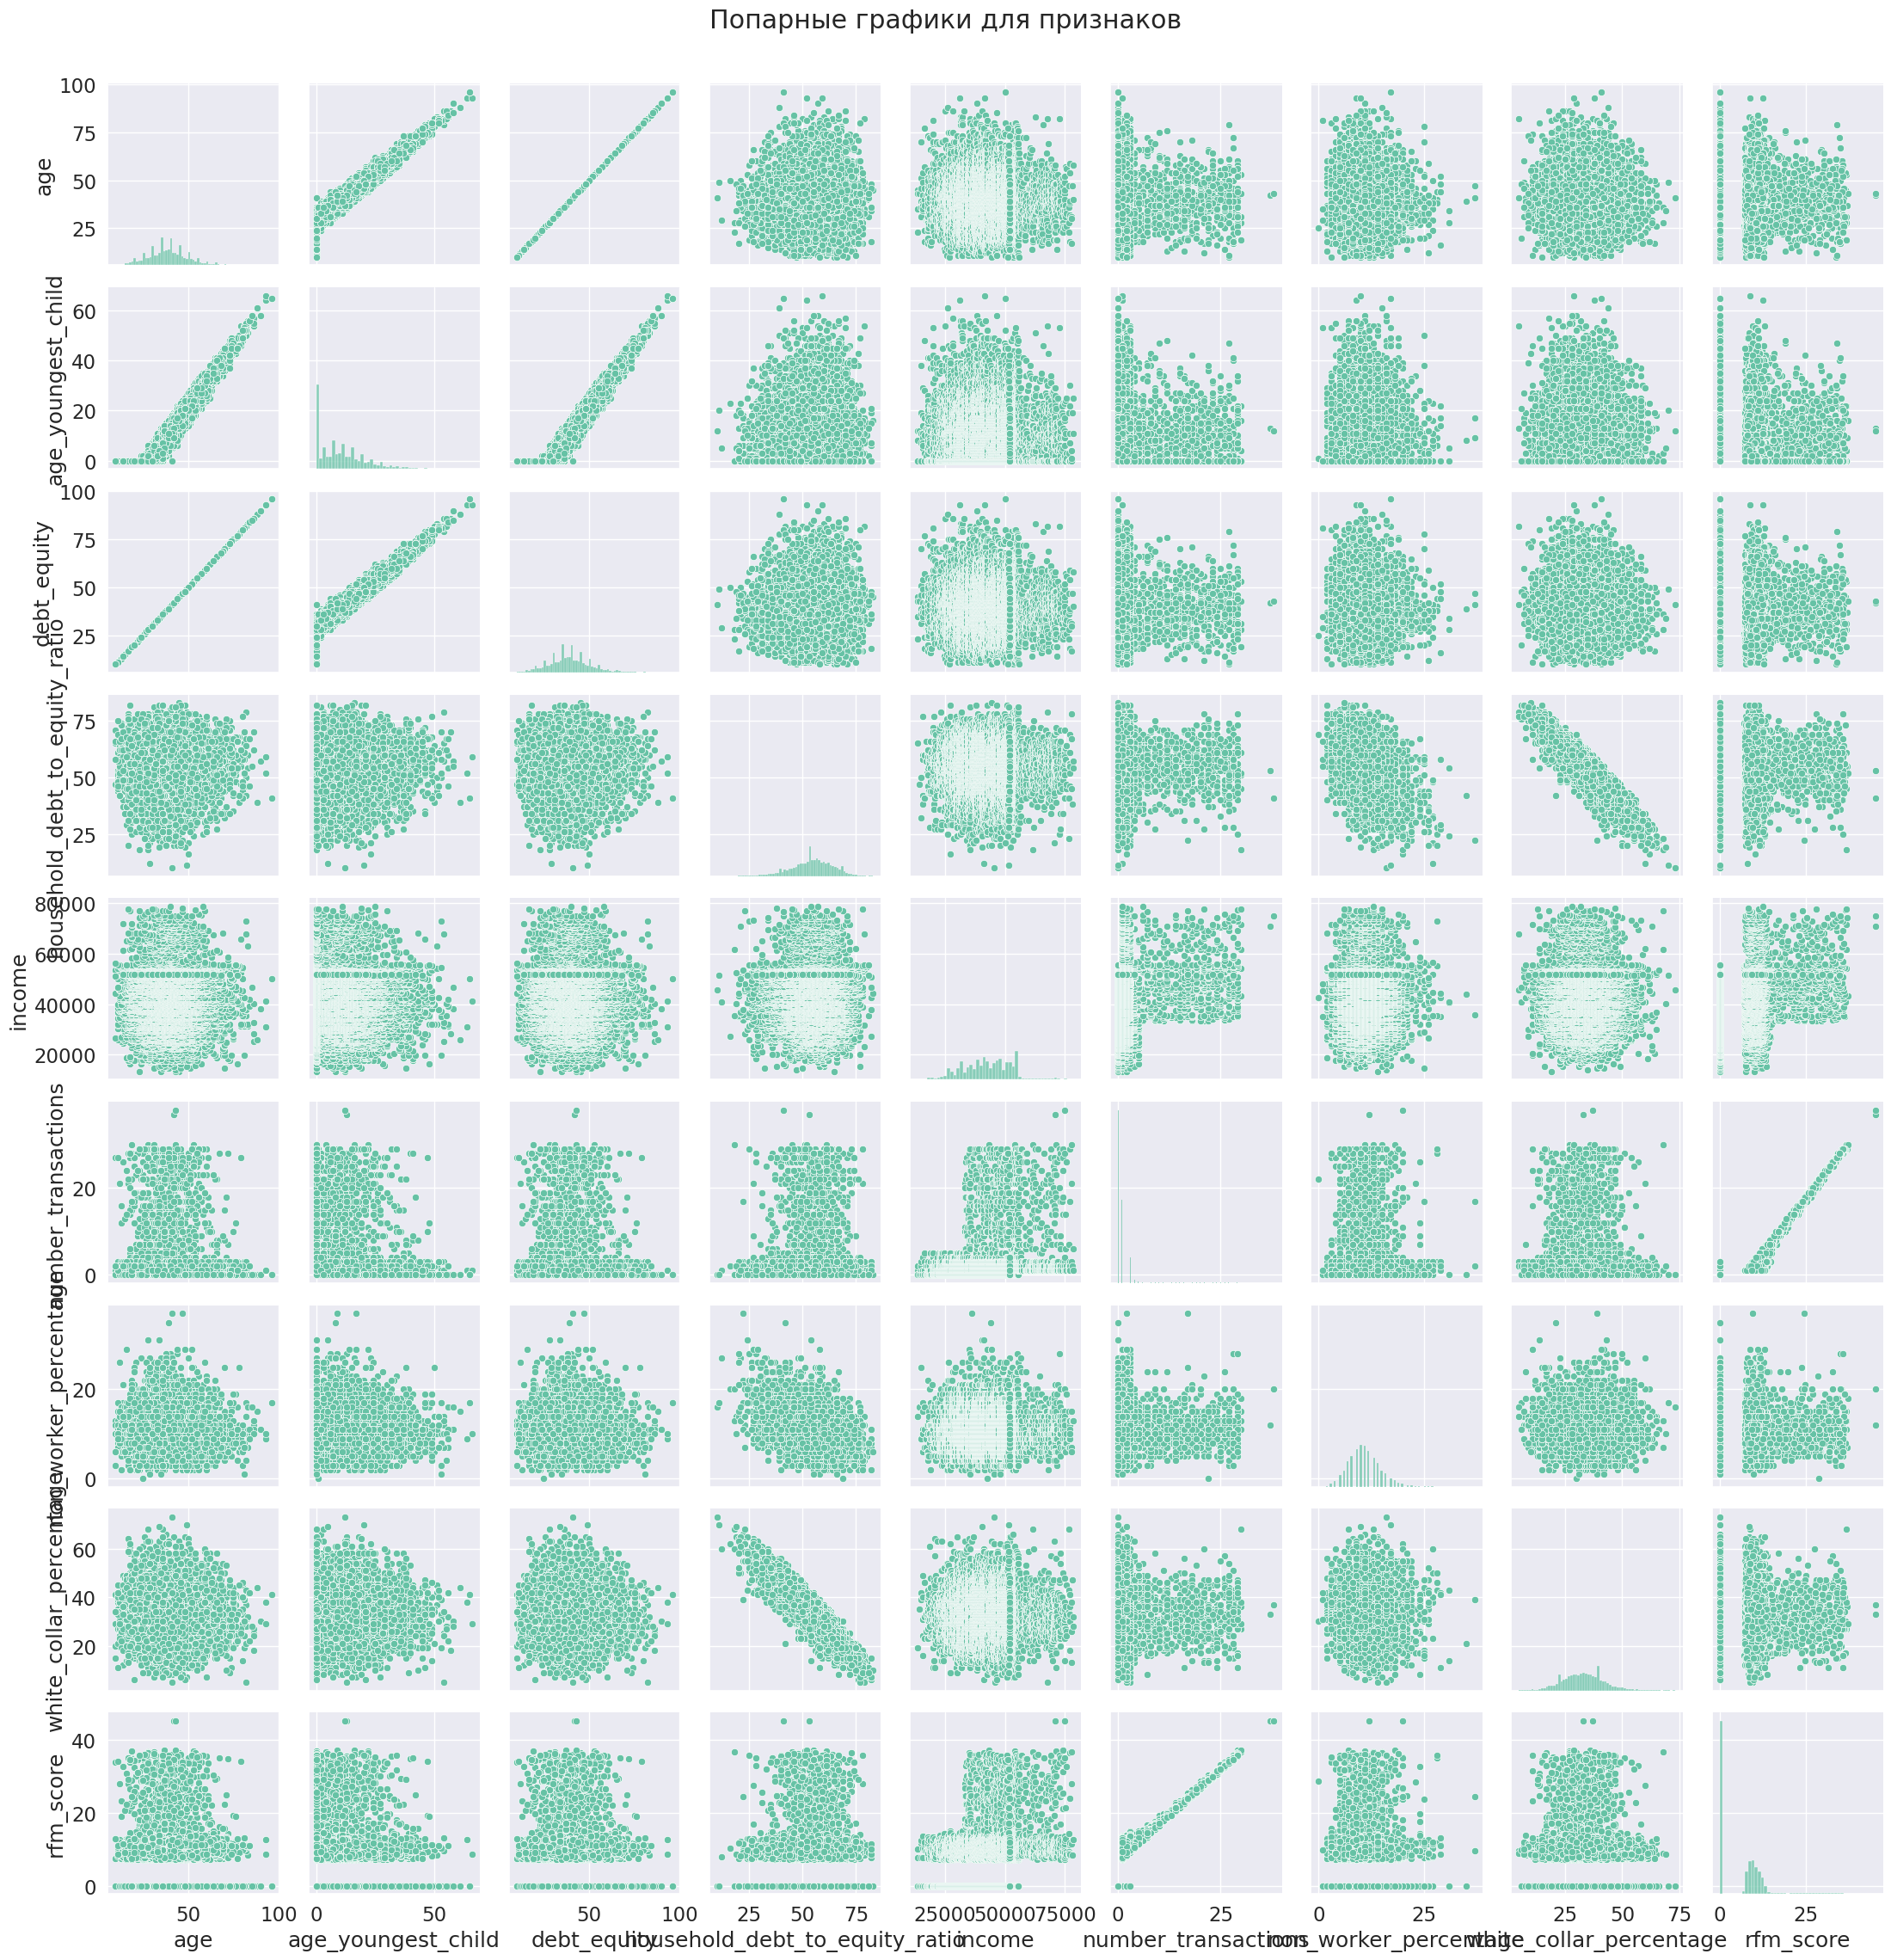

In [ ]:
sns.pairplot(train_data[analitic_features])
plt.suptitle("Попарные графики для признаков", y=1.02)
plt.show()

Построим `pair_grid`, чтобы дополнительно выявить информацию.

In [ ]:
def create_pair_grid(df, diag_kind='hist', upper='scatter', lower='kde', title="Pair Grid of DataFrame Features"):
    """
    Создает и отображает PairGrid для признаков DataFrame с возможностью настройки.

    Args:
        df (pd.DataFrame): DataFrame, для которого нужно построить PairGrid.
        diag_kind (str, optional): Тип графика на диагонали ('hist' для гистограммы, 'kde' для оценки плотности ядра). Defaults to 'hist'.
        upper (str, optional): Тип графика в верхней треугольной части ('scatter' для точечной диаграммы, 'kde' для оценки плотности ядра). Defaults to 'scatter'.
        lower (str, optional): Тип графика в нижней треугольной части ('scatter' для точечной диаграммы, 'kde' для оценки плотности ядра). Defaults to 'kde'.
        title (str, optional): Заголовок графика. Defaults to "Pair Grid of DataFrame Features".
    """

    numeric_df = df.select_dtypes(include=['number'])

    grid = sns.PairGrid(numeric_df)

    if upper == 'scatter':
        grid.map_upper(plt.scatter, alpha=0.8)
    elif upper == 'kde':
        grid.map_upper(sns.kdeplot, fill=True)
    else:
        print(f"Warning: Unknown upper plot type '{upper}'. Using scatter.")
        grid.map_upper(plt.scatter)

    if lower == 'scatter':
        grid.map_lower(plt.scatter, alpha=0.8)
    elif lower == 'kde':
        grid.map_lower(sns.kdeplot, fill=True)
    else:
        print(f"Warning: Unknown lower plot type '{lower}'. Using kde.")
        grid.map_lower(sns.kdeplot, fill=True)

    if diag_kind == 'hist':
        grid.map_diag(plt.hist)
    elif diag_kind == 'kde':
        grid.map_diag(sns.kdeplot, fill=True)
    else:
        print(f"Warning: Unknown diagonal plot type '{diag_kind}'. Using hist.")
        grid.map_diag(plt.hist)

    plt.suptitle(title, y=1.02)
    plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:1615: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  func(x=x, y=y, **kwargs)


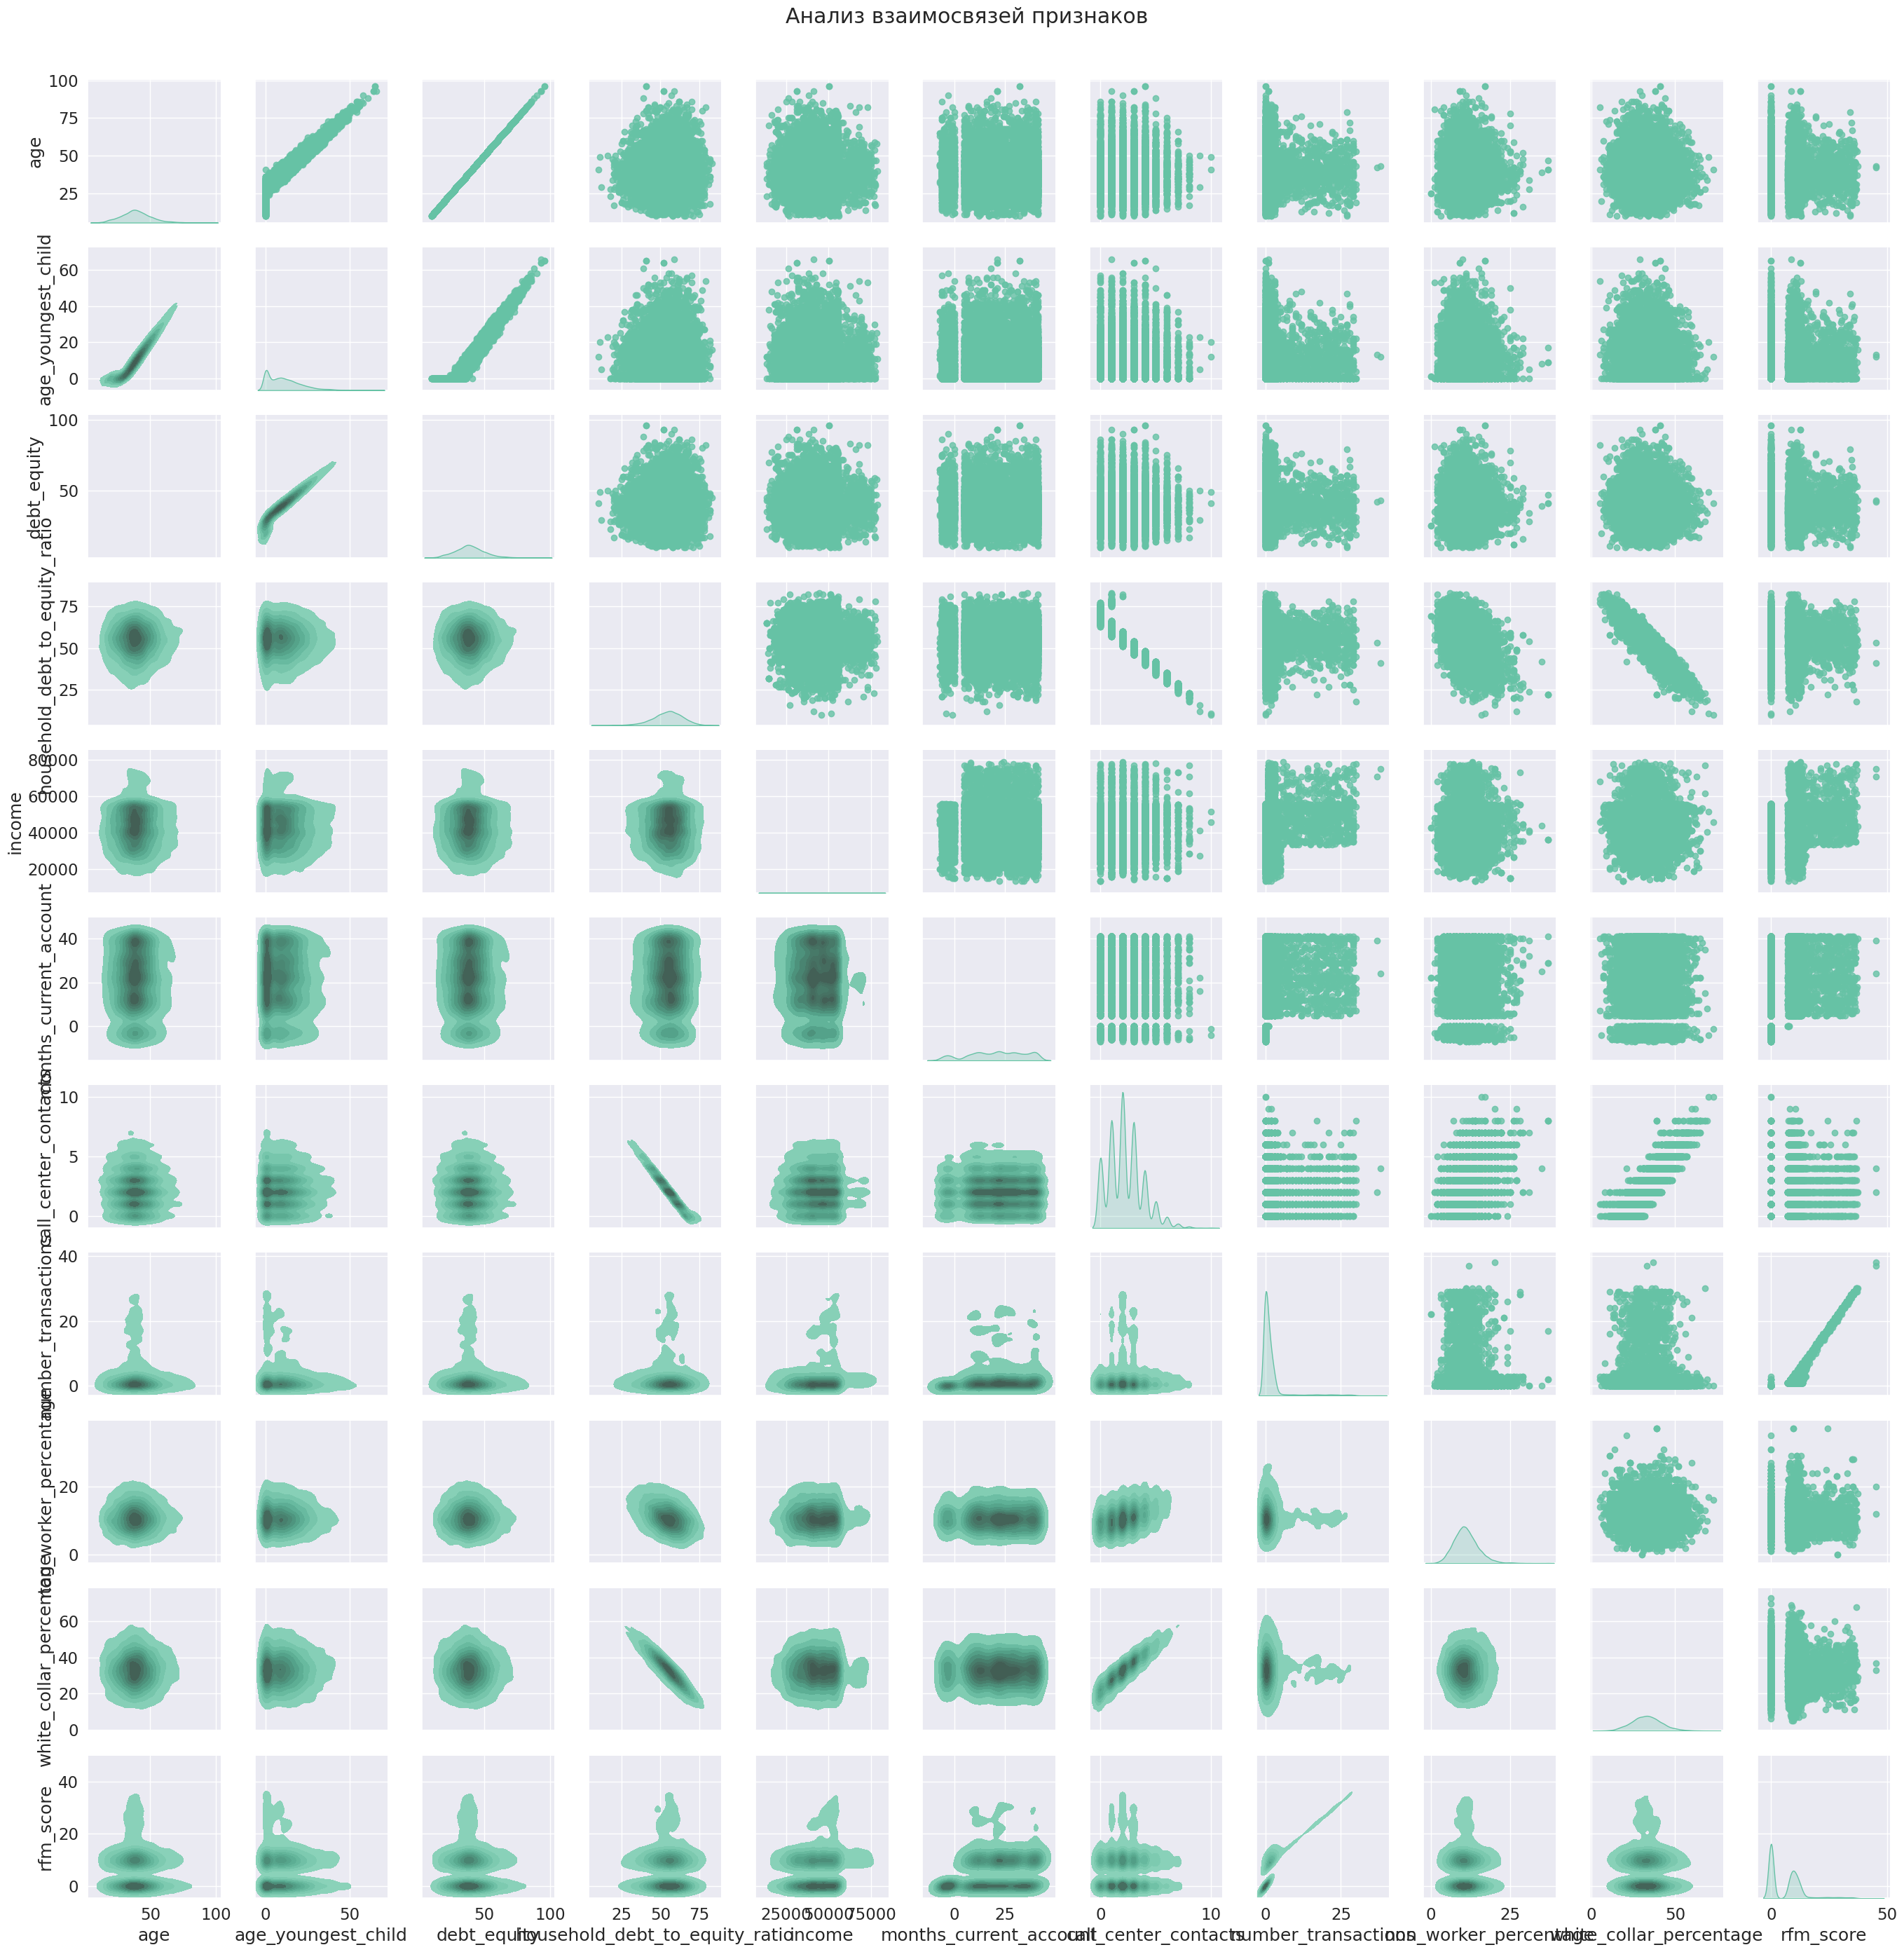

In [ ]:
create_pair_grid(train_data[analitic_features], diag_kind='kde', upper='scatter', lower='kde', title="Анализ взаимосвязей признаков")

Построим отдельно гистаграммы для каждого признака.

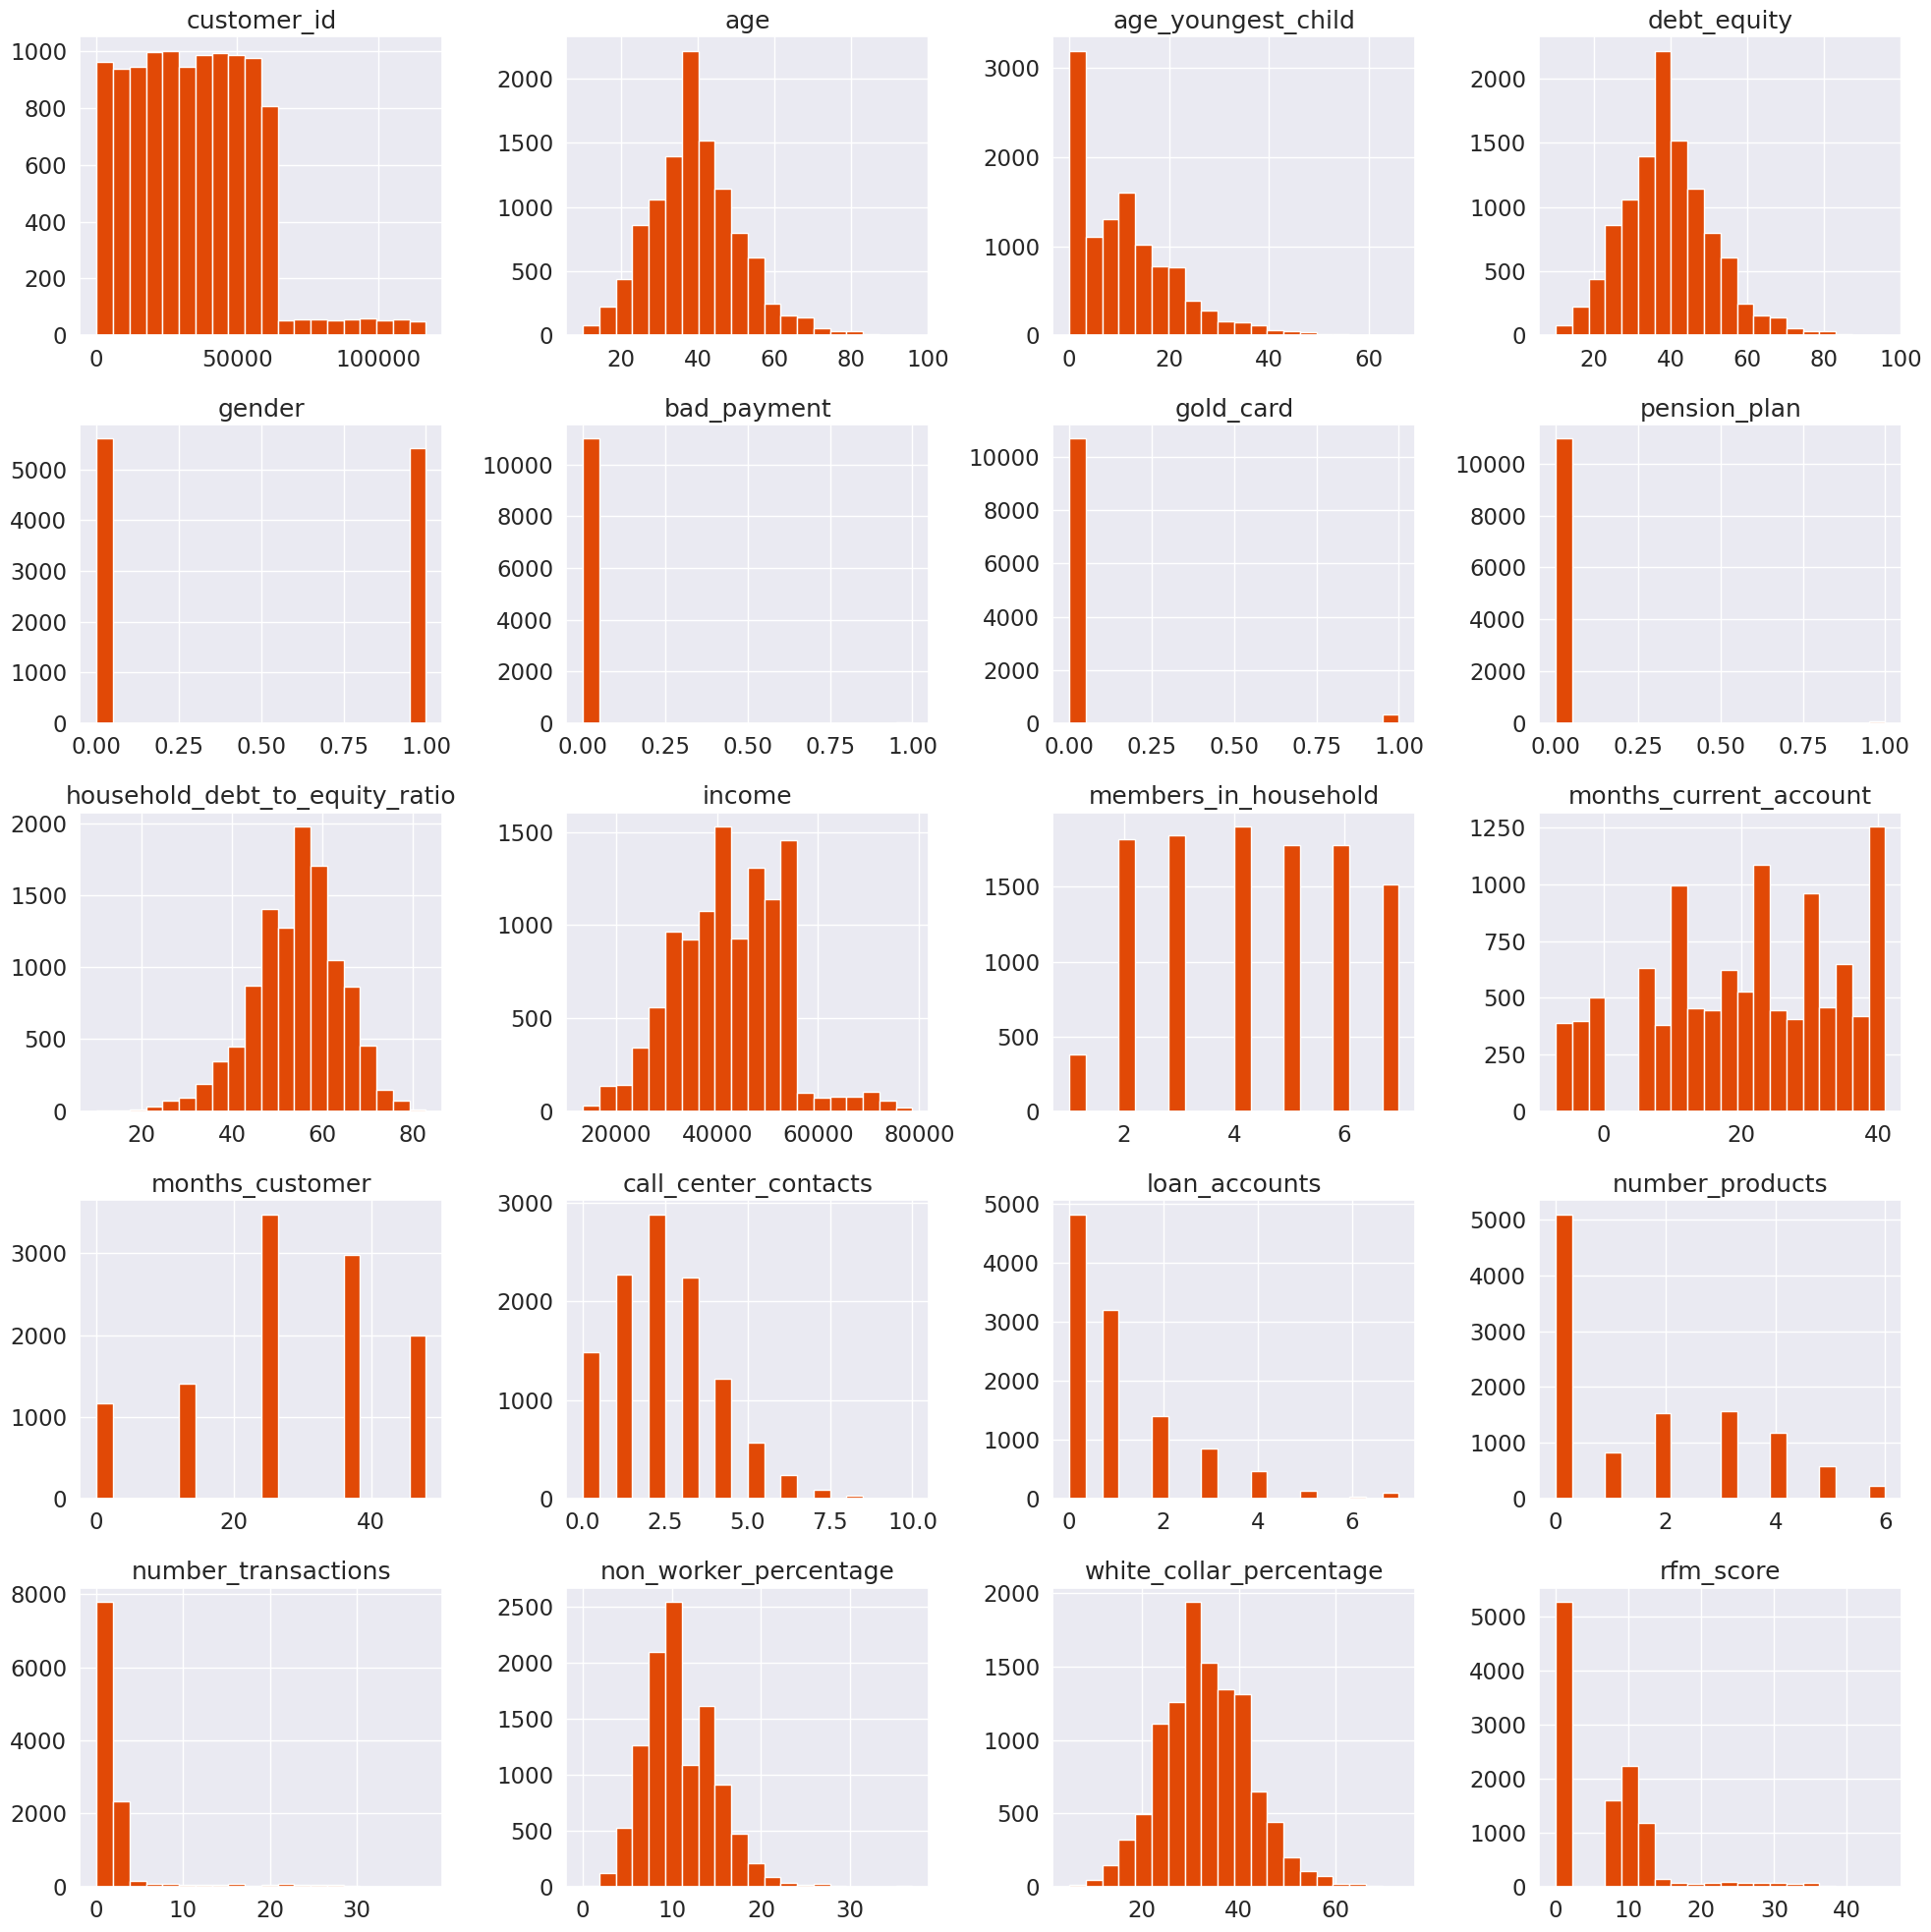

In [ ]:
train_data.hist(bins=20, figsize=(20,20), color='#E14906')
plt.tight_layout()
plt.show()

## Промежуточные предложения.

Признаки:

*   Большая проблема с тем, что смысл некоторых признаков точно установить не удалось.

*   Группы по категориальным признакам, кроме гендера, очненб дисбалансированы. Так что это может стать большой проблемой при обучении на них.

*   Некоторые числовые признаки ведут себя как категориальные, имеет смысл преобразовать из в категориальные.

*    В `age_youngest_child` значение 0 выбивается из распределения, имеет смысл удалить его и добавить категориальный признак `has_children`.

*    C `rfm_score` то же самое, лучше выделить нулевое значение в отдельный признак.

*    Распределение дохода имеет резкий скачок, предлагаю тоже разделить доход на две части - большой доход и маленький.

Связь признаков:

*    Есть сильная линейная зависимость между возрастом клиента и возрастом его младшего ребенка, она объяснима, но надо что-то с этим делать.

*    Есть выраженная линейная зависимость между `household debt to equity ratio` и `call center contacts` и она уже необъяснима.

# Бэйзлайн для признака `Mortage`. Случайный лес.

---



## Испорты.

In [28]:
import copy
import random
import warnings

import numpy as np
import pandas as pd
import scipy.stats as sps

from matplotlib import pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score, confusion_matrix, precision_score, recall_score
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

warnings.simplefilter("ignore", DeprecationWarning)
sns.set(context='poster')
%matplotlib inline

np.random.seed(42)

Загрузим наши данные.

In [11]:
data = pd.read_csv('known_behaviors2.csv')
data.head()

customer_id  age  age_youngest_child  debt_equity  gender  bad_payment  \
0           15   45                  12           45       0            0   
1           16   43                  12           43       0            0   
2           30   23                   0           23       0            0   
3           42   35                   8           35       1            0   
4           52   43                  12           43       1            0   

   gold_card  pension_plan  household_debt_to_equity_ratio  income  ...  \
0          0             0                              65   13453  ...   
1          0             0                              65   13453  ...   
2          0             0                              65   13453  ...   
3          0             0                              65   13453  ...   
4          0             0                              47   14124  ...   

   call_center_contacts  loan_accounts  number_products  number_transactions  \
0                     0              4                2                    1   
1                     0              0                3                    2   
2                     0              1                0                    0   
3                     0              1                0                    0   
4                     3              1                0                    0   

   non_worker_percentage  white_collar_percentage  rfm_score  Mortgage  \
0                     14                       19      7.602         0   
1                     14                       19     10.143         0   
2                     14                       19      0.000         0   
3                     14                       19      0.000         0   
4                     16                       35      0.000         0   

   Pension  Savings  
0        0        0  
1        0        0  
2        0        0  
3        1        0  
4        1        0  

[5 rows x 23 columns]

In [12]:
test = pd.read_csv('unknown_behaviors.csv')
test.head()

customer_id  age  age_youngest_child  debt_equity  gender  bad_payment  \
0        44256   38                  11           38       1            0   
1        46883   30                   1           30       0            0   
2        32387   41                  13           41       1            0   
3        25504   42                  14           42       1            0   
4        35979   42                  14           42       1            0   

   gold_card  pension_plan  household_debt_to_equity_ratio   income  \
0          0             0                              58  47958.0   
1          0             0                              55  48606.0   
2          0             0                              59  42152.0   
3          0             0                              57  39788.0   
4          0             0                              53  44365.0   

   members_in_household  months_current_account  months_customer  \
0                     4                      41               48   
1                     2                      23               36   
2                     4                      39               48   
3                     3                      21               24   
4                     6                      41               48   

   call_center_contacts  loan_accounts  number_products  number_transactions  \
0                     2              1                2                    1   
1                     2              4                3                    2   
2                     1              0                1                    1   
3                     2              3                0                    0   
4                     3              2                3                    1   

   non_worker_percentage  white_collar_percentage  rfm_score  
0                      9                       31      7.949  
1                     11                       33     11.437  
2                     11                       29      7.462  
3                     15                       27      0.000  
4                      5                       41      7.806

Выделим таргет.

In [13]:
feature_columns = test.columns
X = data[feature_columns]
y = data[['Mortgage']]

In [14]:
X.head()

customer_id  age  age_youngest_child  debt_equity  gender  bad_payment  \
0           15   45                  12           45       0            0   
1           16   43                  12           43       0            0   
2           30   23                   0           23       0            0   
3           42   35                   8           35       1            0   
4           52   43                  12           43       1            0   

   gold_card  pension_plan  household_debt_to_equity_ratio  income  \
0          0             0                              65   13453   
1          0             0                              65   13453   
2          0             0                              65   13453   
3          0             0                              65   13453   
4          0             0                              47   14124   

   members_in_household  months_current_account  months_customer  \
0                     2                      33               36   
1                     2                      34               36   
2                     2                      30               36   
3                     2                      22               24   
4                     3                      40               48   

   call_center_contacts  loan_accounts  number_products  number_transactions  \
0                     0              4                2                    1   
1                     0              0                3                    2   
2                     0              1                0                    0   
3                     0              1                0                    0   
4                     3              1                0                    0   

   non_worker_percentage  white_collar_percentage  rfm_score  
0                     14                       19      7.602  
1                     14                       19     10.143  
2                     14                       19      0.000  
3                     14                       19      0.000  
4                     16                       35      0.000

Разделим данные на `train` и `test`.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
X_train = X_train.drop(['customer_id'], axis=1)

In [52]:
X_test = X_test.drop(['customer_id'], axis=1)

### Простенькая модель.

Построим простенькую модель с параметрами по умолчанию и посчитаем `accuracy_score`.

In [53]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

Cравним `mse` на тренировочной и тестовой выборке.

In [54]:
print('RF: mse_train = {:.2f}'.format(mean_squared_error(y_train, model.predict(X_train))))
print('RF: mse_test = {:.2f}'.format(mean_squared_error(y_test, model.predict(X_test))))

RF: mse_train = 0.02
RF: mse_test = 0.11


Разница получилось большой, в порядка пяти раз. Посчитаем `accuracy`, `precision`, `recall` и `f1_score` на тренировочной и тестовой выборке.

In [42]:
def evaluate_binary_classification(y_true, y_predicted, y_probabilities=None, threshold=0.5):
    """
    Оценивает результаты бинарной классификации и выводит метрики и графики.

    Args:
        y_true (array-like): Истинные метки классов (0 или 1).
        y_predicted (array-like): Предсказанные метки классов (0 или 1).  Если переданы вероятности, то предварительно применяем порог к ним.
        y_probabilities (array-like, optional): Предсказанные вероятности принадлежности к классу 1. Defaults to None.
        threshold (float, optional): Порог для определения класса на основе вероятностей. Defaults to 0.5.
    """

    print("=== Binary Classification Evaluation ===")

    cm = confusion_matrix(y_true, y_predicted)
    print("\nConfusion Matrix:")
    print(cm)

    accuracy = accuracy_score(y_true, y_predicted)
    precision = precision_score(y_true, y_predicted)
    recall = recall_score(y_true, y_predicted)
    f1 = f1_score(y_true, y_predicted)

    print(f"\nAccuracy:  {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:    {recall:.4f}")
    print(f"F1 Score:  {f1:.4f}")

    if y_probabilities is not None:

        roc_auc = roc_auc_score(y_true, y_probabilities)
        print(f"\nROC AUC:   {roc_auc:.4f}")

        pr_auc = average_precision_score(y_true, y_probabilities)
        print(f"PR AUC:    {pr_auc:.4f}")

        fpr, tpr, thresholds_roc = roc_curve(y_true, y_probabilities)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("Receiver Operating Characteristic (ROC) Curve")
        plt.legend()
        plt.grid(True)
        plt.show()

        precision, recall, thresholds_pr = precision_recall_curve(y_true, y_probabilities)

        precision = precision[:-1]
        recall = recall[:-1]

        plt.figure(figsize=(8, 6))
        plt.plot(recall, precision, label=f"PR Curve (AUC = {pr_auc:.2f})")
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.title("Precision-Recall (PR) Curve")
        plt.legend()
        plt.grid(True)
        plt.show()

Выведем результаты по метрикам.

In [55]:
evaluate_binary_classification(y_train, model.predict(X_train))

=== Binary Classification Evaluation ===

Confusion Matrix:
[[7405   58]
 [  82 1273]]

Accuracy:  0.9841
Precision: 0.9564
Recall:    0.9395
F1 Score:  0.9479


In [56]:
evaluate_binary_classification(y_test, model.predict(X_test))

=== Binary Classification Evaluation ===

Confusion Matrix:
[[1790  106]
 [ 134  175]]

Accuracy:  0.8912
Precision: 0.6228
Recall:    0.5663
F1 Score:  0.5932


Видим, что `accuracy` имеет на тесте хорошее значение, а вот остальные метрики не так хороши, по сравнению с моделью, рандомно присваивающей значения таргету. На мой взгляд, самая важная метрика для нас это `precision`, так как она показывает отношение настоящих позитивных меток к общему числу позитивных меток, выданной моделью, так как если мы сказали, что клиент склонен к продукту, а он не склонен на самом деле, мы зря потратим деньги на звонок / sms этому клиенту.

### Модель с подбором параметров.

In [45]:
def train_random_forest(X, y, param_grid=None, cv=3, random_state=42):
    """
    Обучает RandomForestClassifier с подбором оптимальных параметров по сетке.

    Args:
        X (pd.DataFrame or np.ndarray): Матрица признаков.
        y (pd.Series or np.ndarray): Вектор целевых переменных.
        param_grid (dict, optional): Сетка параметров для GridSearchCV.
            Если None, используется сетка по умолчанию.
        cv (int, optional): Количество фолдов для кросс-валидации. Defaults to 3.
        random_state (int, optional): Random state для воспроизводимости. Defaults to 42.

    Returns:
        tuple: (best_model, best_params, results)
            best_model: Лучшая обученная модель RandomForestClassifier.
            best_params: Словарь с оптимальными параметрами.
            results:  DataFrame с результатами GridSearchCV.
    """

    if param_grid is None:
        param_grid = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'class_weight': ['balanced', 'balanced_subsample', None]
        }

    rf = RandomForestClassifier(random_state=random_state)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                               cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)

    grid_search.fit(X, y)
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    results = pd.DataFrame(grid_search.cv_results_)

    print("\nBest Parameters:")
    print(best_params)

    return best_model, best_params, results

def evaluate_model(model, X_test, y_test):
    """Оценивает обученную модель на тестовых данных."""
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    evaluate_binary_classification(y_test, y_pred)

    print("\nClassification Report:")
    print(report)

    return y_pred

In [57]:
best_model, best_params, results = train_random_forest(X_train, y_train)
best_model_pred = evaluate_model(best_model, X_test, y_test)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Best Parameters:
{'class_weight': None, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
=== Binary Classification Evaluation ===

Confusion Matrix:
[[1792  104]
 [ 135  174]]

Accuracy:  0.8916
Precision: 0.6259
Recall:    0.5631
F1 Score:  0.5928

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1896
           1       0.63      0.56      0.59       309

    accuracy                           0.89      2205
   macro avg       0.78      0.75      0.77      2205
weighted avg       0.89      0.89      0.89      2205



Ну и сделаем какую-то визуализацию. Например, можем построить диаграмму важности признаков и тепловую карту (ну конечно мы ее уже строили, но теперь интерпретируем).

In [47]:
def visualize_feature_importance(model, feature_names):
    """Визуализирует важность признаков с улучшениями."""
    importances = model.feature_importances_
    indices = np.argsort(importances)

    plt.figure(figsize=(10, 7))
    plt.title('Feature Importances', fontsize=16)
    plt.barh(range(len(indices)), importances[indices], color="#66b3ff", align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices], fontsize=10)
    plt.xlabel('Relative Importance', fontsize=12)
    plt.xlim(0, np.max(importances) * 1.1)
    plt.tight_layout()
    sns.despine()
    plt.show()

def visualize_predictions(y_true, y_pred, class_names=None):
   """Визуализирует предсказанные и истинные значения."""
   cm = confusion_matrix(y_true, y_pred)
   plt.figure(figsize=(8, 6))
   sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
               xticklabels=class_names if class_names else ['Class 0', 'Class 1'],
               yticklabels=class_names if class_names else ['Class 0', 'Class 1'])
   plt.xlabel("Predicted Label")
   plt.ylabel("True Label")
   plt.title("Confusion Matrix")
   plt.show()

Строим столбчатую диаграмму.

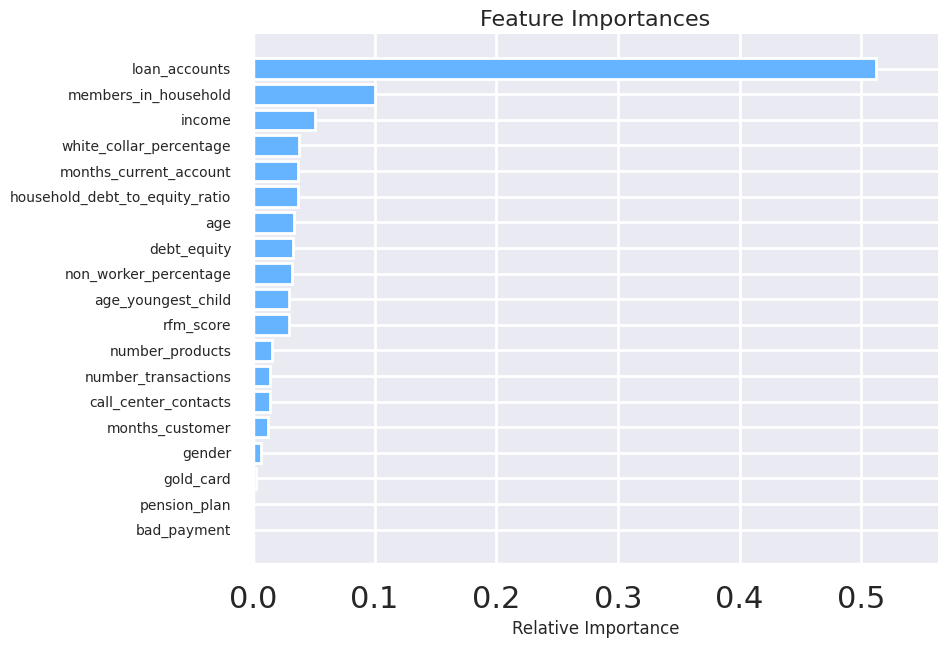

In [58]:
visualize_feature_importance(best_model, X_train.columns)

Видим, что важность признака `loan_accounts` сильно превосходит важность остальных признаков. Как мне кажется, это вероятно так и должно быть, поэтому надо будет в будущем проверить, так ли это.

Также видим, что категориальные признаки болтаются в конце диаграммы, это не очень хорошо. Это все говорит, что признаки все же нужно обработать, например как я предложила выше.

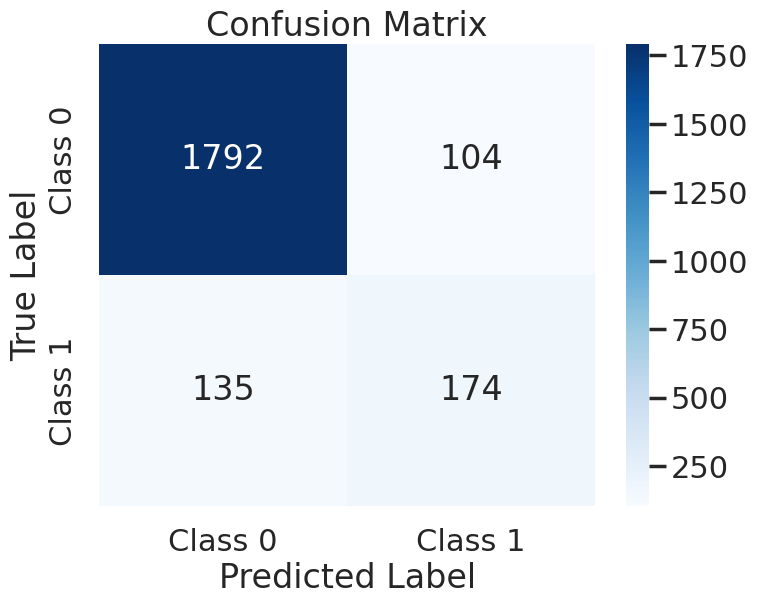

In [59]:
visualize_predictions(y_test, best_model_pred)

По матрице можно сказать, что разница в количестве `FN` и `TN` очень невелика, это очень плохо. Так что с этим тоже надо что-то делать.

### Кривая ROC-AUC.

In [68]:
def roc_auc(model, X_test, y_test):

    y_pred_proba = model.predict_proba(X_test)[:, 1] # Вероятности для класса 1
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"AUC: {roc_auc}")

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')

AUC: 0.9368317561754946


Text(0, 0.5, 'True Positive Rate (TPR)')

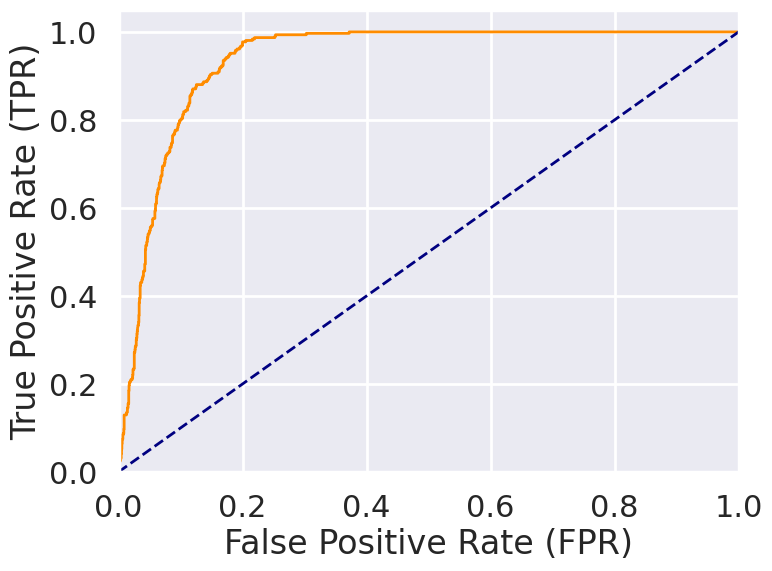

In [60]:
roc_auc(best_model, X_test, y_test)

Значение auc получилось очень хорошее, мы решили взять эту метрику как основную.

### Выводы.

На мой взгляд, самой объективно понятной метрикой будет `precision`, потому что она как раз показывает, сколько мы потеряем на ненужную рекламу. Даже после подбора параметров модель `RandomForestClassifier` не показывазывает достаточно хороших показателей по данной метрике, но все же от чего-то нужно отталкиваться. Так что предлагаю эту модель взять за бэйзлайн, а дальше уже пробовать различные обработки признаков, а также другие варианты архитектур.

Еще забавный момент, я сначала забыла удалить id из признаков, и модель обучилась с таким же качетсвом, и признак id занял высокое место по важности :)

Это еще больше натолкнуло на мысль, что нужно в первую очередь заняться обработкой признаков.

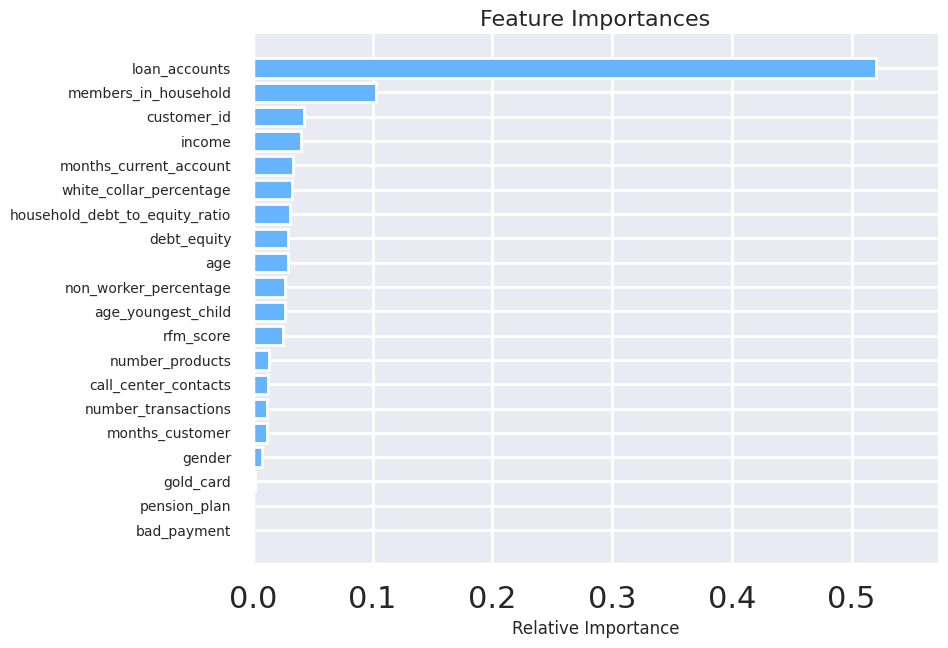

In [ ]:
visualize_feature_importance(best_model, X.columns)

# Признак Pension.

Сделаем новый таргет, разделим выборку.

In [64]:
X = data[feature_columns]
y = data[['Pension']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.drop(['customer_id'], axis=1)
X_test = X_test.drop(['customer_id'], axis=1)

Обучим модель с оптимальными параметрами.

In [65]:
p_best_model, p_best_params, p_results = train_random_forest(X_train, y_train)
p_best_model_pred = evaluate_model(p_best_model, X_test, y_test)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Best Parameters:
{'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
=== Binary Classification Evaluation ===

Confusion Matrix:
[[1648   61]
 [ 436   60]]

Accuracy:  0.7746
Precision: 0.4959
Recall:    0.1210
F1 Score:  0.1945

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      1709
           1       0.50      0.12      0.19       496

    accuracy                           0.77      2205
   macro avg       0.64      0.54      0.53      2205
weighted avg       0.72      0.77      0.72      2205



Посмотрим на важность признаков.

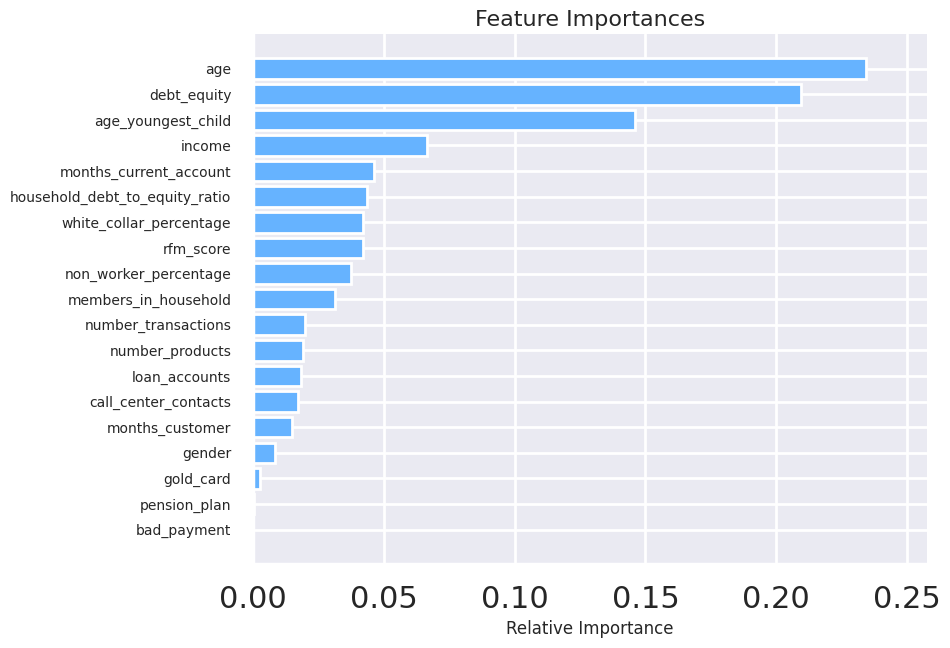

In [66]:
visualize_feature_importance(p_best_model, X_train.columns)

Построим ROC-AUC.

AUC: 0.7630877328752901


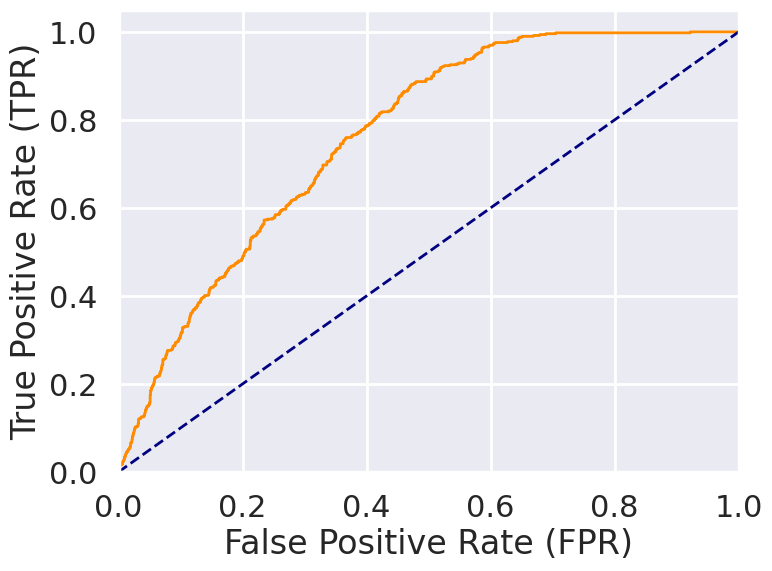

In [69]:
roc_auc(p_best_model, X_test, y_test)

**Выводы:** опять наблюдается почти нулевая важность категориальных признаков, при этом лидирующих стало больше. Как будто возраст и правда должен сильно влиять на склонность к пенсионному продукту, раньше я также подметила связь возраста клиента и его младшего ребенка, тут мы видим очередное подтверждение этой теории. Метрика получилась сильно хуже, чем по ипотеке, значит будем улучшать модель или пробовать другие методы.

# Признак Savings.

Делаем все то же самое.

In [70]:
X = data[feature_columns]
y = data[['Savings']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.drop(['customer_id'], axis=1)
X_test = X_test.drop(['customer_id'], axis=1)

s_best_model, s_best_params, s_results = train_random_forest(X_train, y_train)
s_best_model_pred = evaluate_model(s_best_model, X_test, y_test)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)



Best Parameters:
{'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
=== Binary Classification Evaluation ===

Confusion Matrix:
[[1179  165]
 [ 683  178]]

Accuracy:  0.6154
Precision: 0.5190
Recall:    0.2067
F1 Score:  0.2957

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.88      0.74      1344
           1       0.52      0.21      0.30       861

    accuracy                           0.62      2205
   macro avg       0.58      0.54      0.52      2205
weighted avg       0.59      0.62      0.56      2205



Важность признаков.

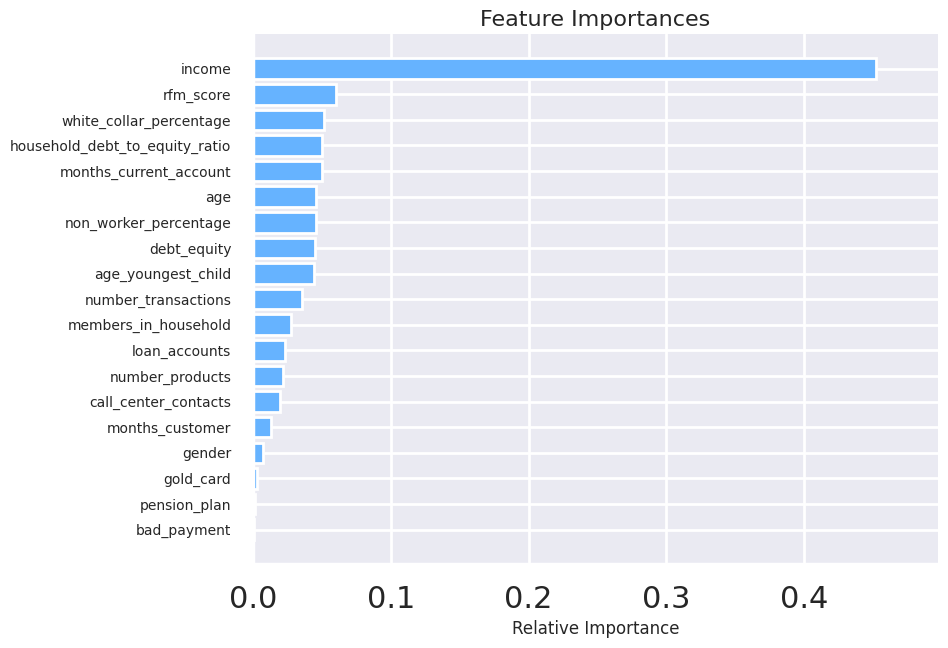

In [73]:
visualize_feature_importance(s_best_model, X_train.columns)

Метрика.

AUC: 0.6685661053039101


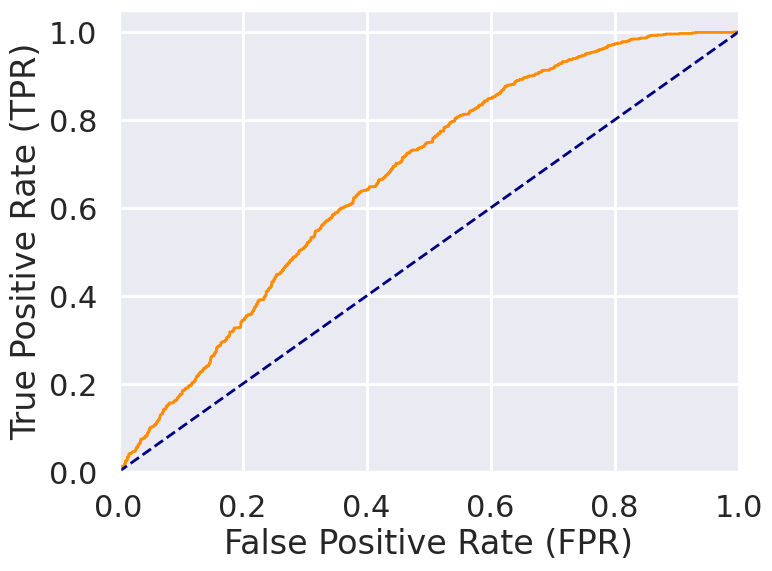

In [74]:
roc_auc(s_best_model, X_test, y_test)

**Выводы:** ожидаемо самый важный признак это доход, та же история с категориальными признаками и значение метрики еще хуже. Так что тут тоже стоит рассотреть другие модели или поработать с признаками.